# Week3授業課題 信用情報の分析

## 1.このテキストについて

テキストの目的
実データに近いものの分析を行う
データセットに対して自ら課題を設定できるようにする

どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


Home Credit Default Risk | Kaggle


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

##  >>このコンペティションでは何を予測する？
顧客のクレジット残高情報や未払い情報などを学習データとし、その顧客が返済能力があるか予測する。

滞納が防げる
適性者を見極めて多くの顧客に貸し出すことができる。
返済能力が見極められれば、適正な金額のローンを組むことができ、収入が予測できる。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("application_train.csv")

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

## 目的変数は「target」

- 1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合
- 0: それ以外の場合

In [3]:
display(df.head())
display(df.info())
display(df.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
# 欠損値の確認
missing_data = pd.DataFrame(df.isnull().sum() / len(df))
missing_data50 = missing_data[missing_data.iloc[:, 0] > 0.5]
display(missing_data50.head())
display(missing_data50.shape)

,0
OWN_CAR_AGE,0.659908
EXT_SOURCE_1,0.563811
APARTMENTS_AVG,0.507497
BASEMENTAREA_AVG,0.585160
YEARS_BUILD_AVG,0.664978


(41, 1)

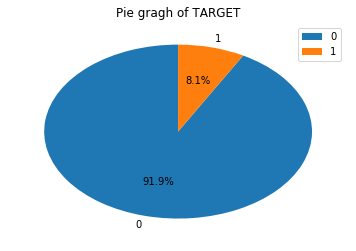

In [5]:
# クラスごとの分布を円グラフで確認
labels = ["0", "1"]

fig, ax = plt.subplots()

ax.pie((len(df_target_0), len(df_target_1)),labels=labels, startangle=90, autopct="%1.1f%%")
ax.set_title("Pie gragh of TARGET")
ax.legend()

plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

## ■仮説
- 1,返済能力の高い顧客は、INCOMEやCREDIT利用率も高いだろう
- 2,世帯のカテゴリー別（単身・ファミリー）で返済能力の差異があるだろう
- 3,

## ■TODO
- 1,TARGET変数と相関の高い変数を探し、TARGET0と1を比較してみる
- 2,相関行列を作成し、TARGETと相関の高い変数を探す。


## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

## 仮説1
返済能力の高い顧客は、INCOMEやCREDIT利用率も高いだろうことから、相関係数を確認する。

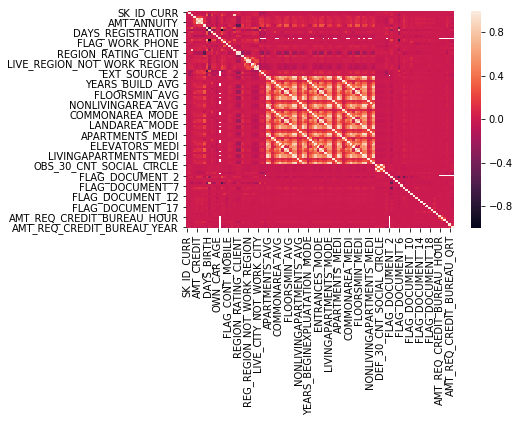

In [30]:
import seaborn as sns

#相関係数行列を作成
df_corr = df.corr()
display(df_corr)

sns.heatmap(df_corr)

## 仮説1の結論
TARGETは0か1かの質的変数のため、相関係数は適さない。
●→質的変数の分析のため、クロス集計表で分析する必要がある。

In [4]:
# 目的変数「target」1と0を分割し、統計値を出力
df_target_1 = df[df["TARGET"] ==1]
display(df_target_1.head())
display(df_target_1.describe())

df_target_0 = df[df["TARGET"] ==0]
display(df_target_0.head())
display(df_target_0.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,...,24825.000000,24825.000000,24825.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,...,0.005720,0.000483,0.000524,0.000564,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,4192.844583,119484.634253,...,0.075416,0.021981,0.022878,0.023741,0.084926,0.106682,0.203941,0.745116,0.643789,1.934063
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,-25168.000000,-16069.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,-18037.000000,-2156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,-14282.000000,-1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,-11396.000000,-379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,...,282686.000000,282686.000000,282686.000000,282686.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,-16138.176397,65696.146123,...,0.008341,0.000605,0.000506,0.000315,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
std,102825.776954,0.0,0.718843,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.013978,4364.200856,142877.810161,...,0.090950,0.024588,0.022486,0.017741,0.083759,0.111091,0.204747,0.928799,0.805355,1.863376
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189103.250000,0.0,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19793.750000,-2813.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278362.500000,0.0,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,-15877.000000,-1235.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367241.500000,0.0,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,0.028663,-12536.000000,-278.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 仮説2
直感的な変数選択として、AMT_INCOME_TOTALでTARGETの差異がないか確認する。
まず、ヒストグラム化してみる。

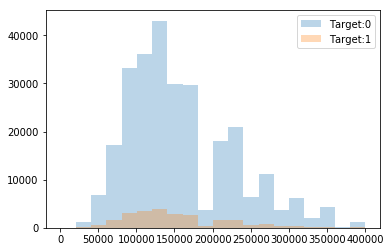

In [19]:
# AMT_INCOME_TOTALラベルでの差異を確認する

labels = ["Target:0", "Target:1"]

fig, ax = plt.subplots()

ax.set_title("Histgram of AMT_INCOME_TOTAL")
ax.hist(df_target_0["AMT_INCOME_TOTAL"], bins=20, alpha=0.3, range=(1000, 400000), label=labels[0])
ax.hist(df_target_1["AMT_INCOME_TOTAL"], bins=20, alpha=0.3, range=(1000, 400000), label=labels[1])

plt.legend()
plt.show()

サンプル数の違いがあるため、差異がうまく可視化できない。
メンター作の「20200123_EDA_example」から正規化(normed=True)することで可視化できることが分かる。

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


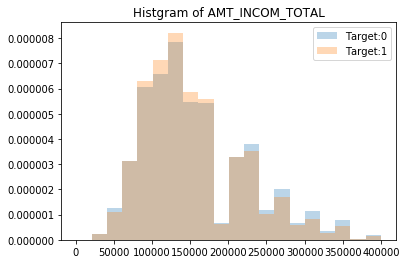

In [21]:
# AMT_INCOME_TOTALラベルでの差異をヒストグラムで確認する

fig, ax = plt.subplots()

ax.set_title("Histgram of AMT_INCOME_TOTAL")
ax.hist(df_target_0["AMT_INCOME_TOTAL"], bins=20, alpha=0.3, normed=True, range=(1000, 400000), label=labels[0])
ax.hist(df_target_1["AMT_INCOME_TOTAL"], bins=20, alpha=0.3, normed=True, range=(1000, 400000), label=labels[1])

plt.legend()
plt.show()

## 仮説2の結論
ヒストグラムをみる限り、AMT_INCOME_TOTALラベルでは分布に差はないと思われる。


## 仮説3
相関関係を調べられないため、クロス集計表（ピボットテーブル）でTARGETにおける差異などを比較してみる。


In [23]:
# ピボットテーブルを作成　平均値で比較
df_pivot_mean = df.pivot_table(df, index="TARGET", aggfunc=[np.mean])
display(df_pivot_mean)

# ピボットテーブルを作成　標準偏差で比較
df_pivot_std = df.pivot_table(df, index="TARGET", aggfunc=[np.std])
display(df_pivot_std)

# ピボットテーブルを作成　中央値で比較
df_pivot_median = df.pivot_table(df, index="TARGET", aggfunc=[np.median])
display(df_pivot_median)

mean                                                  \
         AMT_ANNUITY     AMT_CREDIT AMT_GOODS_PRICE AMT_INCOME_TOTAL   
TARGET                                                                 
0       27163.623349  602648.282002   542736.795003    169077.722266   
1       26481.744290  557778.527674   488972.412554    165611.760906   

                                                             \
       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR   
TARGET                                                        
0                       0.006914                   0.006380   
1                       0.008036                   0.006672   

                                                            \
       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT   
TARGET                                                       
0                       0.270697                  0.265939   
1                       0.227926                  0.259923   

                                                                   ...         \
       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_YEAR       ...          
TARGET                                                             ...          
0                        0.034315                   1.889199       ...          
1                        0.034919                   2.028783       ...          

                                                                             \
       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION     SK_ID_CURR   
TARGET                                                                        
0                        0.014942                   0.050317  278244.744536   
1                        0.017442                   0.055911  277449.167936   

                                                   \
       TOTALAREA_MODE YEARS_BEGINEXPLUATATION_AVG   
TARGET                                              
0            0.103507                    0.977893   
1            0.089769                    0.975634   

                                                                  \
       YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MODE   
TARGET                                                             
0                          0.977916                     0.977225   
1                          0.975570                     0.974938   

                                                          
       YEARS_BUILD_AVG YEARS_BUILD_MEDI YEARS_BUILD_MODE  
TARGET                                                    
0             0.753153         0.756426         0.760297  
1             0.743231         0.746532         0.750688  

[2 rows x 105 columns]

std                                                  \
         AMT_ANNUITY     AMT_CREDIT AMT_GOODS_PRICE AMT_INCOME_TOTAL   
TARGET                                                                 
0       14658.307178  406845.907710   373785.493534    110476.268524   
1       12450.676999  346433.235646   311636.495297    746676.959440   

                                                             \
       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR   
TARGET                                                        
0                       0.111091                   0.083759   
1                       0.106682                   0.084926   

                                                            \
       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT   
TARGET                                                       
0                       0.928799                  0.805355   
1                       0.745116                  0.643789   

                                                                   ...         \
       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_YEAR       ...          
TARGET                                                             ...          
0                        0.204747                   1.863376       ...          
1                        0.203941                   1.934063       ...          

                                                                             \
       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION     SK_ID_CURR   
TARGET                                                                        
0                        0.121323                   0.218599  102825.776954   
1                        0.130914                   0.229755  102383.123458   

                                                   \
       TOTALAREA_MODE YEARS_BEGINEXPLUATATION_AVG   
TARGET                                              
0            0.108043                    0.058406   
1            0.098530                    0.069148   

                                                                  \
       YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MODE   
TARGET                                                             
0                          0.059055                     0.063821   
1                          0.070114                     0.073849   

                                                          
       YEARS_BUILD_AVG YEARS_BUILD_MEDI YEARS_BUILD_MODE  
TARGET                                                    
0             0.113316         0.112101         0.110144  
1             0.112389         0.111189         0.109280  

[2 rows x 105 columns]

median                                              \
       AMT_ANNUITY AMT_CREDIT AMT_GOODS_PRICE AMT_INCOME_TOTAL   
TARGET                                                           
0          24876.0   517788.0        450000.0         148500.0   
1          25263.0   497520.0        450000.0         135000.0   

                                                             \
       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR   
TARGET                                                        
0                            0.0                        0.0   
1                            0.0                        0.0   

                                                            \
       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT   
TARGET                                                       
0                            0.0                       0.0   
1                            0.0                       0.0   

                                                                   ...         \
       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_YEAR       ...          
TARGET                                                             ...          
0                             0.0                        1.0       ...          
1                             0.0                        2.0       ...          

                                                                         \
       REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION SK_ID_CURR   
TARGET                                                                    
0                               0                          0   278362.5   
1                               0                          0   276291.0   

                                                   \
       TOTALAREA_MODE YEARS_BEGINEXPLUATATION_AVG   
TARGET                                              
0              0.0691                      0.9821   
1              0.0617                      0.9811   

                                                                  \
       YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MODE   
TARGET                                                             
0                            0.9821                       0.9816   
1                            0.9811                       0.9806   

                                                          
       YEARS_BUILD_AVG YEARS_BUILD_MEDI YEARS_BUILD_MODE  
TARGET                                                    
0               0.7552           0.7585           0.7648  
1               0.7484           0.7518           0.7550  

[2 rows x 105 columns]

TARGET別の平均値の比較図


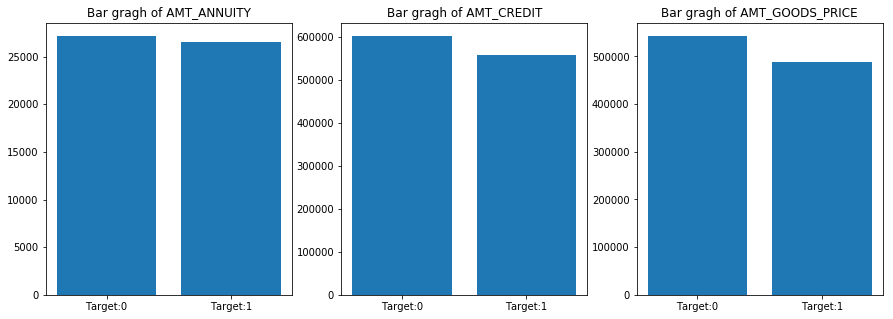

In [54]:
# グラフ描画

print("TARGET別の平均値の比較図")

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].set_title("Bar gragh of AMT_ANNUITY")
axes[0].bar([0, 1], [df_pivot_mean.iloc[0, 0], df_pivot_mean.iloc[1, 0]], tick_label=labels)

axes[1].set_title("Bar gragh of AMT_CREDIT")
axes[1].bar([0, 1], [df_pivot_mean.iloc[0, 1], df_pivot_mean.iloc[1, 1]], tick_label=labels)

axes[2].set_title("Bar gragh of AMT_GOODS_PRICE")
axes[2].bar([0, 1], [df_pivot_mean.iloc[0, 2], df_pivot_mean.iloc[1, 2]], tick_label=labels)

plt.show()

## 仮説3の結論
平均値で比較、グラフ化した時、特にAMT_ANNUITYとAMT_GOODS_PRICEに大きな差があることが分かる。
また、INCOME_TOTALはあまり差がないことも分かった。


In [25]:
# さらに性別も分けてデータフレーム化してみる。
df_pivot_mean_gender = df.pivot_table(df, index=["TARGET", "CODE_GENDER"], aggfunc=[np.mean])
display(df_pivot_mean_gender)

mean                                 \
                     AMT_ANNUITY     AMT_CREDIT AMT_GOODS_PRICE   
TARGET CODE_GENDER                                                
0      F            26359.050064  595146.967346   535387.768004   
       M            28768.557585  617617.410576   557398.756335   
       XNA          19968.750000  399375.000000   421875.000000   
1      F            25584.223147  561140.131757   492775.782787   
       M            27675.350540  553307.957062   483919.343128   

                                                               \
                   AMT_INCOME_TOTAL AMT_REQ_CREDIT_BUREAU_DAY   
TARGET CODE_GENDER                                              
0      F              155984.245110                  0.006813   
       M              195190.418791                  0.007117   
       XNA            186750.000000                  0.000000   
1      F              156670.941531                  0.008249   
       M              177502.085687                  0.007743   

                                                                         \
                   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_MON   
TARGET CODE_GENDER                                                        
0      F                             0.006205                  0.264180   
       M                             0.006735                  0.283887   
       XNA                           0.000000                  0.750000   
1      F                             0.006313                  0.225168   
       M                             0.007165                  0.231712   

                                                                         \
                   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_WEEK   
TARGET CODE_GENDER                                                        
0      F                            0.269637                   0.034523   
       M                            0.258440                   0.033896   
       XNA                          0.250000                   0.000000   
1      F                            0.270623                   0.035522   
       M                            0.245233                   0.034092   

                                                    ...         \
                   AMT_REQ_CREDIT_BUREAU_YEAR       ...          
TARGET CODE_GENDER                                  ...          
0      F                             1.915363       ...          
       M                             1.836070       ...          
       XNA                           3.500000       ...          
1      F                             2.048148       ...          
       M                             2.002196       ...          

                                                                          \
                   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION   
TARGET CODE_GENDER                                                         
0      F                             0.013013                   0.034428   
       M                             0.018792                   0.082009   
       XNA                           0.000000                   0.000000   
1      F                             0.013691                   0.034157   
       M                             0.022431                   0.084843   

                                                                              \
                       SK_ID_CURR TOTALAREA_MODE YEARS_BEGINEXPLUATATION_AVG   
TARGET CODE_GENDER                                                             
0      F            278275.004265       0.101472                    0.977763   
       M            278187.683308       0.107807                    0.978166   
       XNA          200636.500000       0.036800                    0.981467   
1      F            277717.234016       0.088431                    0.976529   
       M            277092.668982       0.091615                    0.

## 結論過程
AMT_CREDITにおいて、TARGET別比較だと、0>1であることが分かっていたが、男女比をみると、TARGET1_Mが最も低金額であることが分かった。
男女比のグラフを作成する。


TARGET別×男女比の平均値の比較図


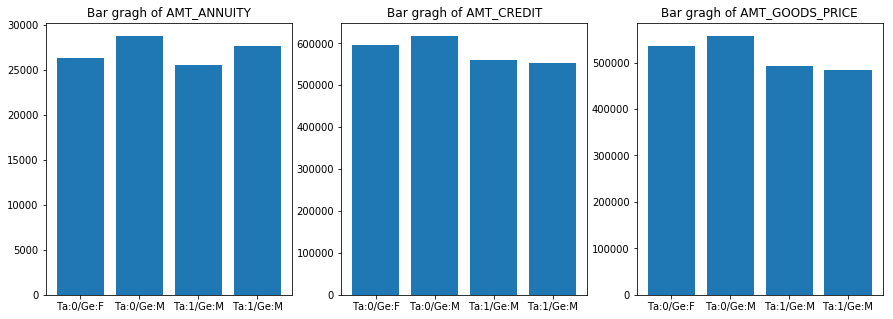

In [67]:
# グラフ描画

label_list = ["Ta:0/Ge:F", "Ta:0/Ge:M", "Ta:1/Ge:M", "Ta:1/Ge:M"]

print("TARGET別×男女比の平均値の比較図")

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

axes[0].set_title("Bar gragh of AMT_ANNUITY")
axes[0].bar(range(len(label_list)), 
                  [df_pivot_mean_gender.iloc[0, 0], df_pivot_mean_gender.iloc[1, 0], df_pivot_mean_gender.iloc[3, 0], df_pivot_mean_gender.iloc[4, 0]], 
                  tick_label=label_list)

axes[1].set_title("Bar gragh of AMT_CREDIT")
axes[1].bar(range(len(label_list)), 
                  [df_pivot_mean_gender.iloc[0, 1], df_pivot_mean_gender.iloc[1, 1], df_pivot_mean_gender.iloc[3, 1], df_pivot_mean_gender.iloc[4, 1]], 
                  tick_label=label_list)

axes[2].set_title("Bar gragh of AMT_GOODS_PRICE")
axes[2].bar(range(len(label_list)),
                  [df_pivot_mean_gender.iloc[0, 2], df_pivot_mean_gender.iloc[1, 2], df_pivot_mean_gender.iloc[3, 2], df_pivot_mean_gender.iloc[4, 2]], 
                  tick_label=label_list)

plt.show()

In [63]:
display(df.groupby(by="CODE_GENDER").count())   # 男女別サンプル数

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,202448,202448,202448,202448,202448,202448,202448,202448,202440,202259,...,202448,202448,202448,202448,176264,176264,176264,176264,176264,176264
M,105059,105059,105059,105059,105059,105059,105059,105059,105055,104970,...,105059,105059,105059,105059,89724,89724,89724,89724,89724,89724
XNA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


## 備忘メモ
https://www.news.com.au/lifestyle/relationships/m-f-or-x-third-gender-now-official/news-story/1c73c9bfbed4bfd45a475389d590cdc1
- 上記より、CODE_GENDERのXNAは、性別を明かしたくない人のコード（と思われる）
XNAの人は男女比と比べて、各数値が低い傾向。

## 仮説3の結論
男女比というよりもAMT_CREDITの数値によってTARGETの値に関係がある。

## 仮説4
世帯のカテゴリー別（単身・ファミリー）で返済能力の差異があるだろう

In [78]:
# 家族層を加え、データフレーム化
display(df.groupby(by="NAME_FAMILY_STATUS").count())

df_pivot_mean_family = df.pivot_table(df, index=["TARGET", "NAME_FAMILY_STATUS",], aggfunc=[np.mean])
display(df_pivot_mean_family)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_FAMILY_STATUS,,,,,,,,,,,,,,,,,,,,,
Civil marriage,29775,29775,29775,29775,29775,29775,29775,29775,29775,29773,...,29775,29775,29775,29775,24974,24974,24974,24974,24974,24974
Married,196432,196432,196432,196432,196432,196432,196432,196432,196432,196425,...,196432,196432,196432,196432,172132,172132,172132,172132,172132,172132
Separated,19770,19770,19770,19770,19770,19770,19770,19770,19770,19770,...,19770,19770,19770,19770,17349,17349,17349,17349,17349,17349
Single / not married,45444,45444,45444,45444,45444,45444,45444,45444,45444,45441,...,45444,45444,45444,45444,37627,37627,37627,37627,37627,37627
Unknown,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,1,1,1,1,1
Widow,16088,16088,16088,16088,16088,16088,16088,16088,16088,16088,...,16088,16088,16088,16088,13909,13909,13909,13909,13909,13909


mean                                 \
                              AMT_ANNUITY     AMT_CREDIT AMT_GOODS_PRICE   
TARGET NAME_FAMILY_STATUS                                                  
0      Civil marriage        25170.197822  545522.372846   486234.854080   
       Married               28683.586394  646753.955992   584446.756985   
       Separated             24976.712479  554150.599587   495778.848845   
       Single / not married  24567.992326  508227.572194   455421.348671   
       Unknown               31500.000000  630000.000000             NaN   
       Widow                 22116.005148  488674.121807   435202.280802   
1      Civil marriage        24797.022796  505813.189970   438078.275769   
       Married               27824.353939  597094.819091   525812.239788   
       Separated             24912.005556  529294.350000   461071.075000   
       Single / not married  24503.768118  478889.393202   416847.293127   
       Widow                 22649.859125  523387.575240   457319.554963   

                                                                        \
                            AMT_INCOME_TOTAL AMT_REQ_CREDIT_BUREAU_DAY   
TARGET NAME_FAMILY_STATUS                                                
0      Civil marriage          168494.935882                  0.006898   
       Married                 171118.133804                  0.006864   
       Separated               171569.149835                  0.006690   
       Single / not married    168929.832477                  0.007432   
       Unknown                 326250.000000                  0.000000   
       Widow                   143049.910901                  0.006468   
1      Civil marriage          161914.457447                  0.003817   
       Married                 169718.917576                  0.007538   
       Separated               167452.152778                  0.010332   
       Single / not married    158632.161431                  0.011304   
       Widow                   142221.236926                  0.010417   

                                                        \
                            AMT_REQ_CREDIT_BUREAU_HOUR   
TARGET NAME_FAMILY_STATUS                                
0      Civil marriage                         0.006323   
       Married                                0.006519   
       Separated                              0.006815   
       Single / not married                   0.005969   
       Unknown                                0.000000   
       Widow                                  0.005327   
1      Civil marriage                         0.006361   
       Married                                0.006666   
       Separated                              0.008118   
       Single / not married                   0.007246   
       Widow                                  0.002604   

                                                       \
                            AMT_REQ_CREDIT_BUREAU_MON   
TARGET NAME_FAMILY_STATUS                               
0      Civil marriage                        0.273302   
       Married                               0.270996   
       Separated                             0.297549   
       Single / not married                  0.272025   
       Unknown                               0.000000   
       Widow                                 0.226467   
1      Civil marriage                        0.225615   
       Married                               0.229408   
       Separated                             0.257565   
       Single / not married                  0.216232   
       Widow                                 0.210938   

                                                       \
                            AMT_REQ_CREDIT_BUREAU_QRT   
TARGET NAME_FAMILY_STATUS                               
0      Civil marriage                        0.261717   
       Married                               0.268207   
       Separated                      

## グラフにするまでもなく、Married層が各値で高い。

In [116]:
## CHILDRENでも確認
display(df.groupby(by="CNT_CHILDREN").count())

print("サンプル数として参考値にできるのは4人まで")

df_pivot_mean_children = df.pivot_table(df, index=["TARGET", "CNT_CHILDREN",], aggfunc=[np.mean])
display(df_pivot_mean_children)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,,,,,,,,,,,,,,,,,,,,,
0,215371,215371,215371,215371,215371,215371,215371,215371,215359,215194,...,215371,215371,215371,215371,185323,185323,185323,185323,185323,185323
1,61119,61119,61119,61119,61119,61119,61119,61119,61119,61051,...,61119,61119,61119,61119,53362,53362,53362,53362,53362,53362
2,26749,26749,26749,26749,26749,26749,26749,26749,26749,26724,...,26749,26749,26749,26749,23583,23583,23583,23583,23583,23583
3,3717,3717,3717,3717,3717,3717,3717,3717,3717,3711,...,3717,3717,3717,3717,3258,3258,3258,3258,3258,3258
4,429,429,429,429,429,429,429,429,429,427,...,429,429,429,429,355,355,355,355,355,355
5,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,76,76,76,76,76,76
6,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,16,16,16,16,16,16
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,6,6,6,6,6
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


サンプル数として参考値にできるのは4人まで


mean                                \
                      AMT_ANNUITY    AMT_CREDIT AMT_GOODS_PRICE   
TARGET CNT_CHILDREN                                               
0      0             26964.671796  6.023313e+05   543447.138423   
       1             27536.667502  6.006952e+05   538440.282746   
       2             27774.496519  6.083567e+05   545932.619174   
       3             28138.734445  6.099619e+05   547362.677751   
       4             28871.254011  6.359072e+05   570701.612903   
       5             28225.577922  5.894673e+05   516097.402597   
       6             22004.100000  5.322174e+05   437700.000000   
       7             23312.571429  4.579444e+05   399214.285714   
       8             26833.500000  4.975200e+05   450000.000000   
       10             8930.250000  1.049085e+05    90000.000000   
       12            34609.500000  4.743900e+05   438750.000000   
       14            34980.000000  8.330700e+05   747000.000000   
       19            11340.000000  2.022750e+05   180000.000000   
1      0             26246.125233  5.604703e+05   492989.507050   
       1             26665.696370  5.440486e+05   473461.934471   
       2             27557.010502  5.678873e+05   494779.084942   
       3             27685.696927  5.885087e+05   512723.463687   
       4             25773.463636  4.979680e+05   428685.381818   
       5             21288.214286  3.733901e+05   333642.857143   
       6             32041.500000  5.025330e+05   461250.000000   
       9             26696.250000  5.832855e+05   452250.000000   
       11            38515.500000  1.007762e+06   927000.000000   

                                                                \
                    AMT_INCOME_TOTAL AMT_REQ_CREDIT_BUREAU_DAY   
TARGET CNT_CHILDREN                                              
0      0               166747.010980                  0.006885   
       1               175008.249905                  0.006806   
       2               173638.366582                  0.007579   
       3               175181.301131                  0.004755   
       4               173941.844920                  0.012780   
       5               174889.870130                  0.014493   
       6               144750.000000                  0.000000   
       7               136928.571429                  0.000000   
       8               108000.000000                  0.000000   
       10               67500.000000                  0.000000   
       12              281250.000000                  0.000000   
       14              108000.000000                  0.000000   
       19              112500.000000                  0.000000   
1      0               160804.210548                  0.009166   
       1               182361.980198                  0.005674   
       2               161512.254393                  0.006173   
       3               162379.055866                  0.006369   
       4               143378.181818                  0.000000   
       5               209571.428571                  0.000000   
       6               142500.000000                  0.000000   
       9               225000.000000                  0.000000   
       11              315000.000000                  0.000000   

                                                                          \
                    AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_MON   
TARGET CNT_CHILDREN                                                        
0      0                              0.006273                  0.275334   
       1                              0.007093                  0.268245   
       2                              0.005961                  0.249134   
       3                              0.003736                  0.203125   
       4                              0.009585                  0.277955   
       5                              0.000000                  0.115942   
       6          

## 仮説4の結論
単身者と比べてファミリー層の方が各種数値が高い傾向。
子供の数はそこまで関係性はないが、4人までの数値を見ると子供が増えるにつれて数値も少し上がる印象（微差）。ただし、TARGET1に関しては、4人が一番低い額となっていて、家庭内で経済破綻しているのかもしれない。他のラベルで検証してみたいところ。

問題4についてはグラフとクロス集計表で15個作成できたため、作成終了とする。

## 【問題5】（アドバンス課題）Notebooksへの投稿
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。

## 問題５については実施していません。

## 作業時間
- 7/22 5h
- 7/23 5h

In [ ]:

相関行列
欠損値の割合をグラフ化
平均・標準偏差比較


In [ ]:
https://note.nkmk.me/python-pandas-nan-dropna-fillna/